We have our dataset in the google drive so to access the dataset we are trying to mount our drive with this notebook.

In [ ]:
from google.colab import drive #mounting our drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os

DATASET_PATH = '/content/drive/MyDrive/dataset' #the path of drive where the dataset lies
for dirname, _, filenames in os.walk(DATASET_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(12).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(1).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(10).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(48).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(49).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(46).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(45).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(47).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(44).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(42).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(5).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(41).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(43).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(40).jpg
/content/drive/MyDrive/dataset/Testing/glioma_tumor/image(4).jpg
/content/driv

### importing libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

### Folder paths

In [ ]:
X_train = []
Y_train = []
image_size = 150
TRAINING_PATH = '/content/drive/MyDrive/dataset/Training'
TESTING_PATH = '/content/drive/MyDrive/dataset/Testing'
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join(TRAINING_PATH, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(TESTING_PATH, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

### Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential()

model.add(Conv2D(32,(3,3),padding='same', activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/29
83/83 [==============================] - 8s 93ms/step - loss: 0.1973 - accuracy: 0.9266 - val_loss: 1.0565 - val_accuracy: 0.7245
Epoch 2/29
83/83 [==============================] - 7s 90ms/step - loss: 0.2154 - accuracy: 0.9209 - val_loss: 0.3551 - val_accuracy: 0.8741
Epoch 3/29
83/83 [==============================] - 7s 88ms/step - loss: 0.1473 - accuracy: 0.9467 - val_loss: 0.2887 - val_accuracy: 0.9082
Epoch 4/29
83/83 [==============================] - 7s 90ms/step - loss: 0.1372 - accuracy: 0.9512 - val_loss: 0.5450 - val_accuracy: 0.8231
Epoch 5/29
83/83 [==============================] - 8s 91ms/step - loss: 0.1215 - accuracy: 0.9595 - val_loss: 0.5480 - val_accuracy: 0.8299
Epoch 6/29
83/83 [==============================] - 8s 91ms/step - loss: 0.1257 - accuracy: 0.9569 - val_loss: 0.7448 - val_accuracy: 0.7891
Epoch 7/29
83/83 [==============================] - 7s 90ms/step - loss: 0.1285 - accuracy: 0.9550 - val_loss: 0.7821 - val_accuracy: 0.7551
Epoch 8/29
83

### evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

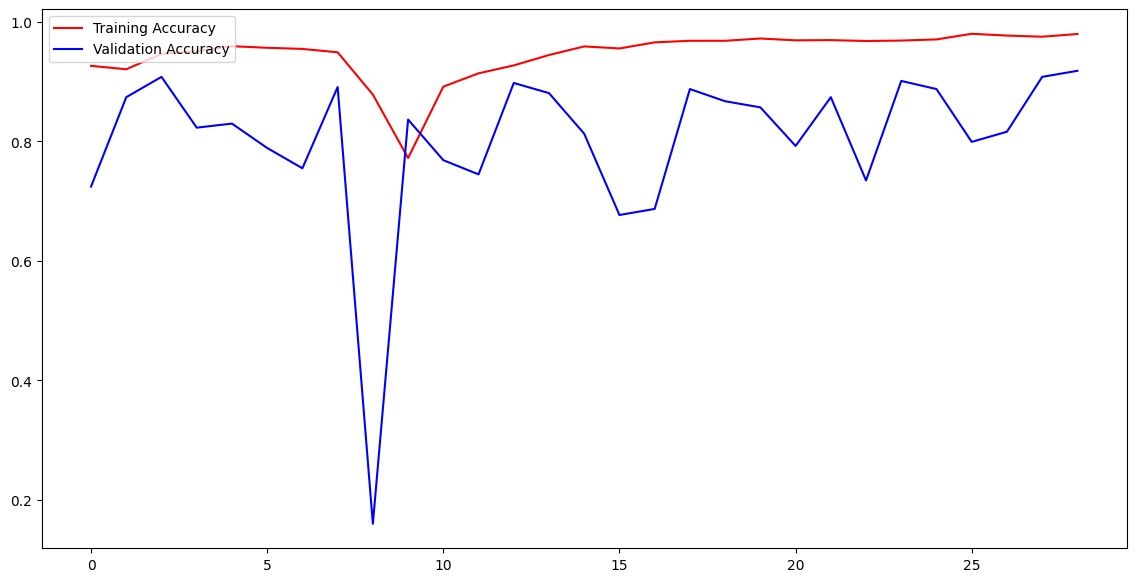

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

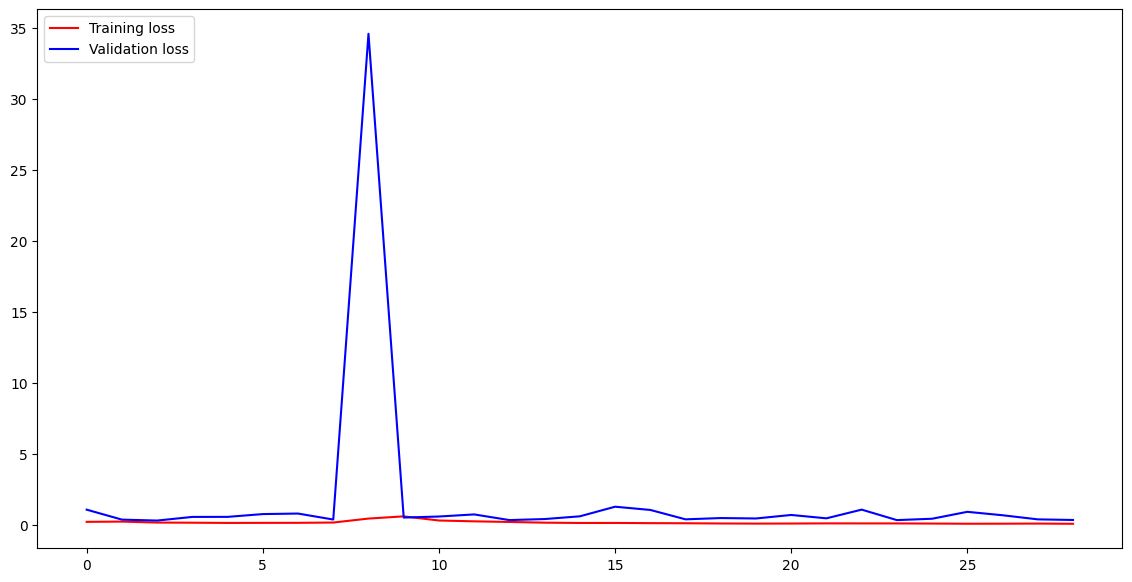

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training Accuracy:', acc[-1])
print('Validation Accuracy:', val_acc[-1])


Training Accuracy: 0.979947030544281
Validation Accuracy: 0.918367326259613


In [ ]:
_, acc = model.evaluate(X_test,y_test)
print('Test Accuracy:', acc)


11/11 [==============================] - 0s 22ms/step - loss: 0.3164 - accuracy: 0.9266
Test Accuracy: 0.9266055226325989


### prediction

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

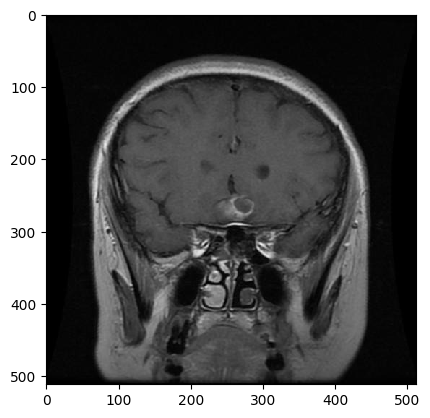

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
# plt.imshow(img)
plt.show()

In [ ]:
a=model.predict(img_array)
print(labels[a.argmax()])

1/1 [==============================] - 0s 18ms/step
pituitary_tumor


In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/dataset/Training/no_tumor/image(67).jpg')
img2 = cv2.resize(img2,(150,150))
img_array2 = np.array(img2)
img_array2.shape

(150, 150, 3)

In [ ]:
img_array2 = img_array2.reshape(1,150,150,3)
img_array2.shape

(1, 150, 150, 3)

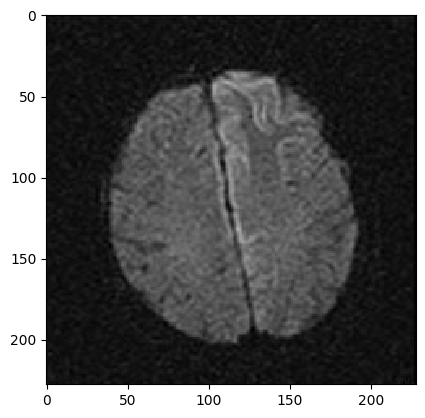

In [ ]:
from tensorflow.keras.preprocessing import image
img2 = image.load_img('/content/drive/MyDrive/dataset/Training/no_tumor/image(68).jpg')
plt.imshow(img2,interpolation='nearest')
# plt.imshow(img)
plt.show()

In [ ]:
a2=model.predict(img_array2)
print(labels[a2.argmax()])

1/1 [==============================] - 0s 19ms/step
no_tumor


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Converting predictions from one-hot encoding to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Converting true labels from one-hot encoding to integer labels
y_true_labels = np.argmax(y_test, axis=1)

# Computing precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 0s 24ms/step
Precision: 0.9262724502113038
Recall: 0.926605504587156
F1 Score: 0.9261473013529703


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Print confusion matrix
print(cm)


[[84  5  3  1]
 [ 6 86  2  1]
 [ 2  1 46  3]
 [ 0  0  0 87]]


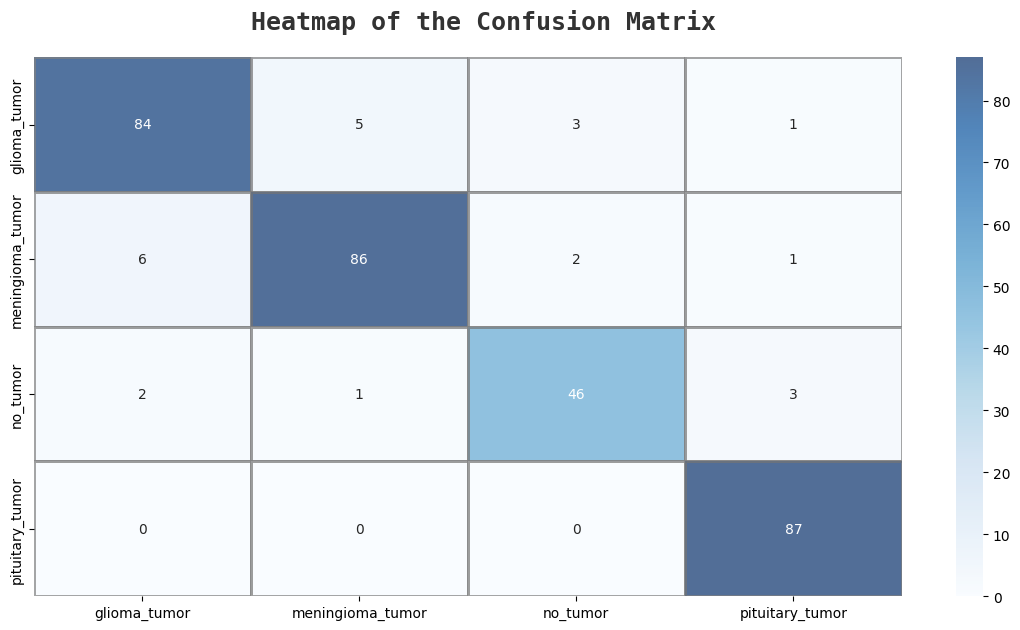

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming cm is your confusion matrix, and you have labels defined for the axes
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(cm, ax=ax, annot=True, cmap='Blues', alpha=0.7, linewidths=2, linecolor='grey')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Adding a title and adjusting its properties
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color='black', y=0.92, x=0.28, alpha=0.8)

plt.show()



In [ ]:
from tensorflow.keras.applications import DenseNet121
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
model_dn = densenet.output
model_dn = tf.keras.layers.GlobalAveragePooling2D()(model_dn)
model_dn = tf.keras.layers.Dropout(rate=0.5)(model_dn)
model_dn = tf.keras.layers.Dense(4,activation='softmax')(model_dn)
model_dn = tf.keras.models.Model(inputs=densenet.input, outputs = model_dn)

In [ ]:
model_dn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 156, 156, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 75, 75, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1/conv[0][0]']      

In [ ]:
model_dn.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
import tensorflow as tf

tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs')
checkpoint = tf.keras.callbacks.ModelCheckpoint("effnet.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001,
                                                  mode='auto', verbose=1)

In [ ]:
history_dn = model_dn.fit(X_train,y_train,validation_split=0.1, epochs =20, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.7715
Epoch 1: val_accuracy improved from -inf to 0.49320, saving model to effnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 125s 408ms/step - loss: 0.7034 - accuracy: 0.7715 - val_loss: 2.4448 - val_accuracy: 0.4932 - lr: 0.0010
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8691
Epoch 2: val_accuracy improved from 0.49320 to 0.61905, saving model to effnet.h5
83/83 [==============================] - 17s 200ms/step - loss: 0.3688 - accuracy: 0.8691 - val_loss: 1.5506 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.2391 - accuracy: 0.9171
Epoch 3: val_accuracy improved from 0.61905 to 0.77211, saving model to effnet.h5
83/83 [==============================] - 20s 241ms/step - loss: 0.2391 - accuracy: 0.9171 - val_loss: 1.3551 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 4/20
83/83 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9421
Epoch 4: val_accuracy improved from 0.77211 to 0.82653, saving model to effnet.h5
83/83 [=============================

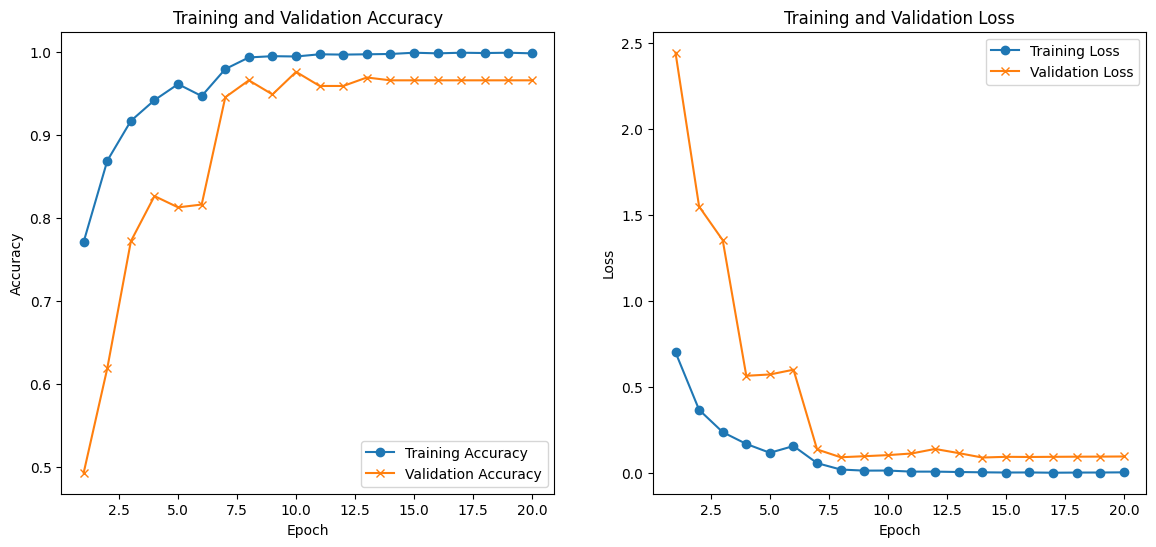

In [ ]:
import matplotlib.pyplot as plt

# Extracting metrics from the history object
train_acc = history_dn.history['accuracy']
val_acc = history_dn.history['val_accuracy']
train_loss = history_dn.history['loss']
val_loss = history_dn.history['val_loss']

# Generate list of epoch numbers
epochs = range(1, len(train_acc) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy
ax1.plot(epochs, train_acc, label='Training Accuracy', marker='o')
ax1.plot(epochs, val_acc, label='Validation Accuracy', marker='x')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(epochs, train_loss, label='Training Loss', marker='o')
ax2.plot(epochs, val_loss, label='Validation Loss', marker='x')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.show()


In [ ]:
pred = model_dn.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 6s 270ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        93
           1       0.96      0.98      0.97        95
           2       0.96      0.94      0.95        52
           3       0.97      1.00      0.98        87

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



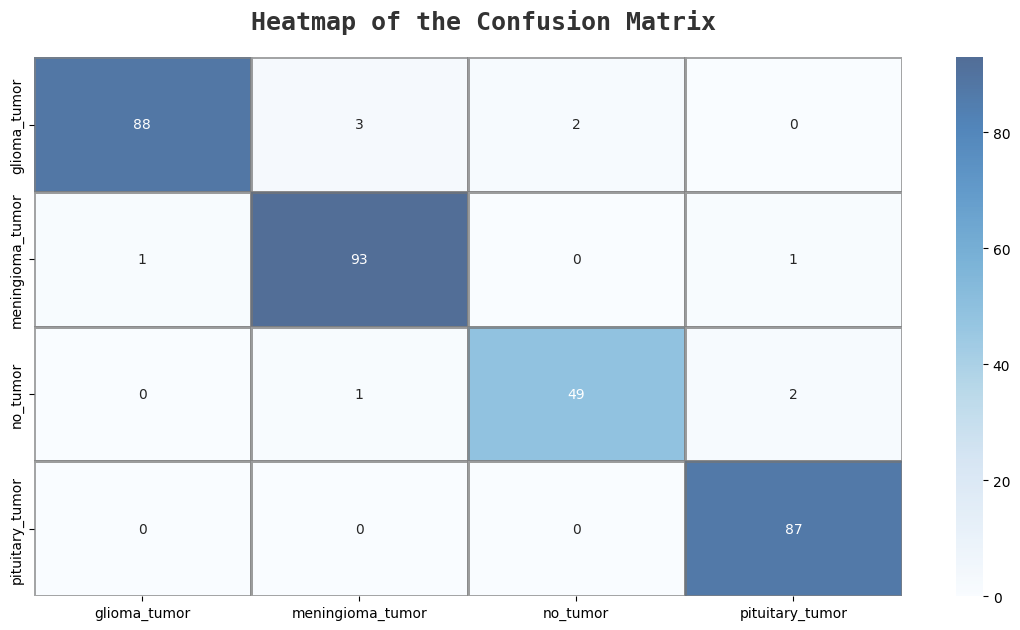

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_new and pred are defined, as well as labels for the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap="Blues", alpha=0.7, linewidths=2, linecolor='grey')
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color='black', y=0.92, x=0.28, alpha=0.8)

plt.show()


In [ ]:
pred = model_dn.predict(X_test)
pred = np.argmax(pred, axis=1)

# Assuming y_test is one-hot encoded, if it's not, you don't need the next line
y_test_new = np.argmax(y_test, axis=1)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test_new, pred)

# Print the accuracy
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

11/11 [==============================] - 1s 52ms/step
Testing Accuracy: 96.94%
